### Read the data training data and testing datasets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

trainDataset = pd.read_csv('../input/train_tweets.csv', encoding = "ISO-8859-1")
testDataset = pd.read_csv('../input/test_tweets.csv', encoding = "ISO-8859-1")
trainDataset.columns

Index(['id', 'label', 'tweet'], dtype='object')

### Find out all the hashes in the training dataset and plot them

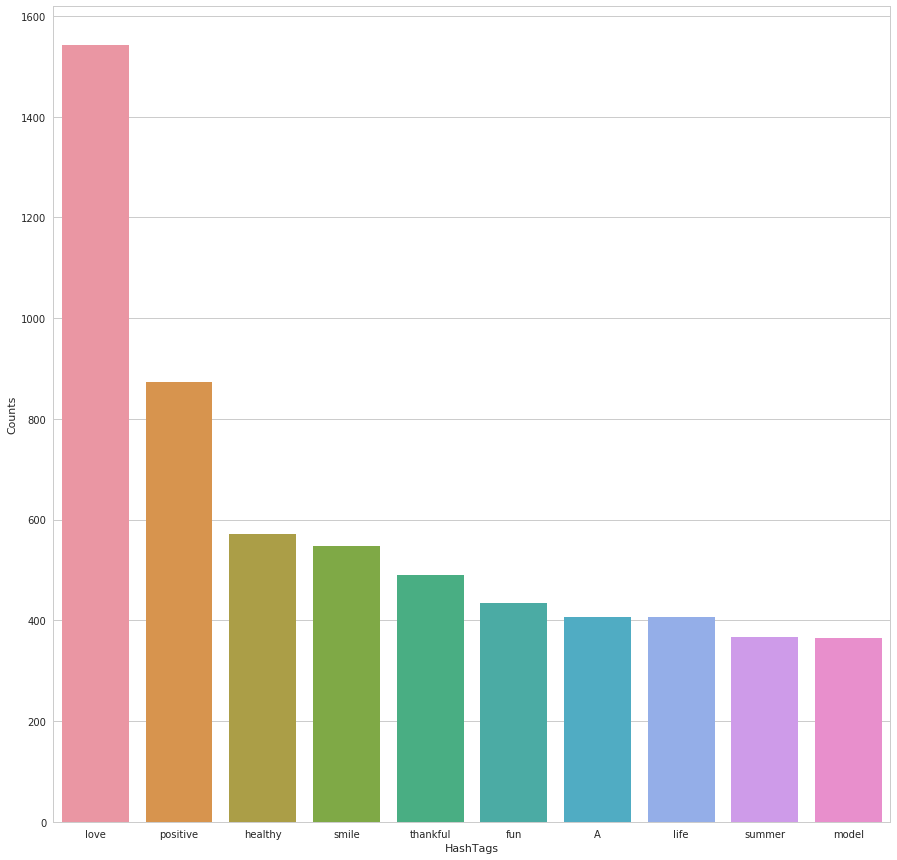

In [2]:
import re
import operator

hashTagDict = {}
requiredSentences = trainDataset.tweet.values
for sent in requiredSentences:
    requiredHashTagList = re.findall(r'#(\w+)',sent)
    for h in range(len(requiredHashTagList)):
        reqHashTag = requiredHashTagList[h]
        if(reqHashTag in hashTagDict):
            hashTagDict[reqHashTag] += 1
        else:
            hashTagDict[reqHashTag] = 1
hashTagDict_sorted = dict(sorted(hashTagDict.items(),key=operator.itemgetter(1),reverse=True))
requiredKeys = list(hashTagDict_sorted.keys())[:10]
requiredValues = list(hashTagDict_sorted.values())[:10]
d = {'HashTags': requiredKeys , 'Counts': requiredValues}
hashTagData = pd.DataFrame(data=d)
plt.figure(1, figsize=(15,15))
sns.set(style="whitegrid")
sns.barplot(x="HashTags", y="Counts", data=hashTagData)

### Clean the tweets

In [3]:
import re
def clean_tweet(tweet):
    tweet = re.sub('http\S+\s*', '', tweet)  # remove URLs
    tweet = re.sub('RT|cc', '', tweet)  # remove RT and cc
    tweet = re.sub('#\S+', '', tweet)  # remove hashtags
    tweet = re.sub('@\S+', '', tweet)  # remove mentions
    tweet = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', tweet)  # remove punctuations
    tweet = re.sub(r'[^\x00-\x7f]',r'', tweet) 
    tweet = re.sub('\s+', ' ', tweet)  # remove extra whitespace
    return tweet

### Add a column containing cleaned tweets in training and testing dataset

In [4]:
trainDataset['cleaned_text'] = trainDataset.tweet.apply(lambda x: clean_tweet(x))
testDataset['cleaned_text'] = testDataset.tweet.apply(lambda x: clean_tweet(x))

In [5]:
trainDataset.head()

,id,label,tweet,cleaned_text
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so self...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for credit i cant use cause they dont ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now


### Displaying the number of good tweets and bad tweets

In [6]:
print ("Total Number of tweets")
print (trainDataset.shape[0])
print ("____________________________________")

print ("Number of racist/sexist tweets - ", str(len(trainDataset[trainDataset['label'] == 1])))
print ("Percentage of racist/sexist tweets")
print (len(trainDataset[trainDataset['label'] == 1])/ len(trainDataset) * 100)
print ("____________________________________")

print ("Number of  not racist/sexist tweets - ", str(len(trainDataset[trainDataset['label'] == 0])))
print ("Percentage of not racist/sexist tweets")
print (len(trainDataset[trainDataset['label'] == 0])/ len(trainDataset) * 100)
print ("____________________________________")

Total Number of tweets
31962
____________________________________
Number of racist/sexist tweets -  2242
Percentage of racist/sexist tweets
7.014579813528565
____________________________________
Number of  not racist/sexist tweets -  29720
Percentage of not racist/sexist tweets
92.98542018647143
____________________________________


### Count plot displaying the target variable distribution

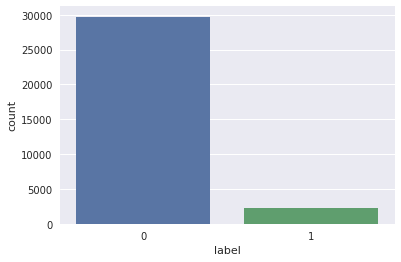

In [7]:
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x=trainDataset['label'])

### Similarly a Pie chart displaying the distribution of the target variable

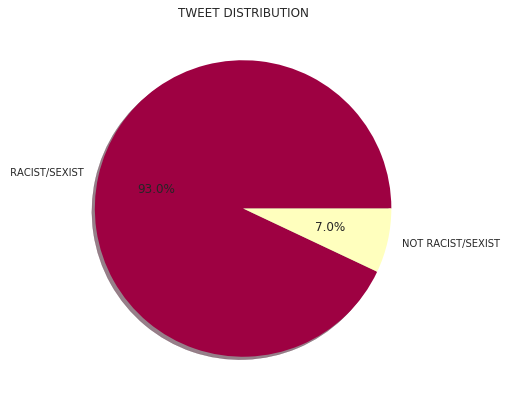

In [8]:
from matplotlib.gridspec import GridSpec
targetCounts = trainDataset.label.value_counts()
targetLabels  =[' RACIST/SEXIST', 'NOT RACIST/SEXIST']
# Make square figures and axes
plt.figure(1, figsize=(15,15))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='TWEET DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

### Collecting the total number of words and finding the most frequently occuring words

In [9]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string

oneSetOfStopWords = set(stopwords.words('english')+['``',"''","Ã¢Â\x80Â¦"])
totalWords = []
tweets = trainDataset['tweet'].values
cleanedSentences = ""
for x in range(1,len(trainDataset['cleaned_text'])):
    cleanedSentence = trainDataset['cleaned_text'][x]    
    cleanedSentences += cleanedSentence
    requiredWords = nltk.word_tokenize(cleanedSentence)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('day', 2026), ('amp', 1604), ('happy', 1576), ('love', 1205), ('im', 1150), ('u', 1138), ('time', 1086), ('like', 977), ('today', 937), ('new', 921), ('get', 916), ('cant', 811), ('people', 804), ('good', 792), ('one', 775), ('see', 754), ('dont', 729), ('life', 713), ('go', 649), ('want', 647), ('take', 615), ('fathers', 595), ('bihday', 584), ('got', 575), ('make', 534), ('need', 507), ('way', 506), ('bull', 504), ('2', 492), ('going', 488), ('great', 483), ('us', 477), ('days', 476), ('best', 473), ('first', 470), ('work', 469), ('really', 462), ('wait', 462), ('thankful', 455), ('ur', 454), ('back', 442), ('know', 431), ('tomorrow', 420), ('never', 408), ('week', 404), ('think', 395), ('morning', 387), ('world', 381), ('feel', 374), ('much', 369), ('right', 366), ('well', 366), ('sad', 348), ('youre', 340), ('even', 339), ('always', 334), ('last', 332), ('night', 329), ('come', 329), ('weekend', 328), ('next', 325), ('still', 322), ('finally', 320), ('year', 303), ('find', 303), 

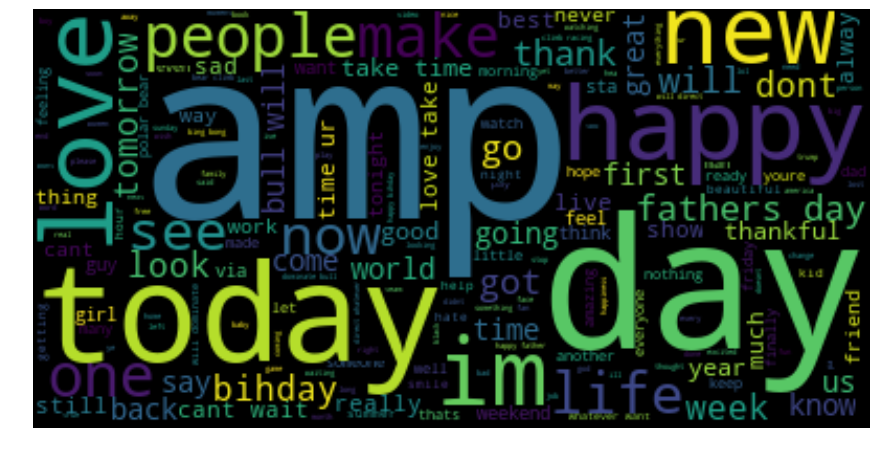

In [15]:
# Displaying the word cloud 
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Initializing the Tf-Idf Vectorizer function. Initializing the predictor and target variables

In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score, f1_score

from sklearn.feature_extraction.text import TfidfVectorizer
import time

X = trainDataset['cleaned_text'].values
y = trainDataset['label'].values
testData = testDataset['cleaned_text'].values
requiredID = testDataset['id'].values
print (testData.shape)
'''
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 3),
    max_features=1000)
#word_vectorizer = TfidfVectorizer(min_df=5, max_df = 0.8, sublinear_tf=True, use_idf =True, stop_words = 'english')
'''
#tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2, max_features=2500,  analyzer='word', ngram_range=(1, 3), stop_words='english')
tfidf_vectorizer = TfidfVectorizer(max_features=10000,  analyzer='word', ngram_range=(1, 3))
#tfidf_vectorizer.fit(X)

X_vectorized = tfidf_vectorizer.fit_transform(X)
testData_vectorized = tfidf_vectorizer.transform(testData)

(17197,)


In [26]:
print (X_vectorized.shape)
print (testData_vectorized.shape)

(31962, 10000)
(17197, 10000)


### Over-Sampling the data as the dataset is imbalanced

In [27]:
print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_vectorized, y)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 2242
Before OverSampling, counts of label '0': 29720 

After OverSampling, the shape of train_X: (59440, 10000)
After OverSampling, the shape of train_y: (59440,) 

After OverSampling, counts of label '1': 29720
After OverSampling, counts of label '0': 29720


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, random_state=0, test_size=0.33)
print (X_train.shape , X_test.shape, y_train.shape, y_test.shape)

Lr_clf = LogisticRegression(solver='sag')
Lr_clf.fit(X_train, y_train)
predicted = Lr_clf.predict(X_test)
print("Classification report for classifier %s:\n%s\n" % (Lr_clf, classification_report(y_test, predicted)))
print("Accuracy - %.3f\n" % (accuracy_score(y_test, predicted)))
print("F1_score - %.3f\n" % (f1_score(y_test, predicted)))

(39824, 10000) (19616, 10000) (39824,) (19616,)
Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      9801
           1       0.89      0.96      0.92      9815

   micro avg       0.92      0.92      0.92     19616
   macro avg       0.92      0.92      0.92     19616
weighted avg       0.92      0.92      0.92     19616


Accuracy - 0.916

F1_score - 0.920



In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
predicted = rf_clf.predict(X_test)
print("Classification report for classifier %s:\n%s\n" % (rf_clf, classification_report(y_test, predicted)))
print("Accuracy - %.3f\n" % (accuracy_score(y_test, predicted)))
print("F1_score - %.3f\n" % (f1_score(y_test, predicted)))

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
testingPredicitons = rf_clf.predict(testData_vectorized)
testingPredicitons.shape

In [ ]:
sub = pd.DataFrame({'id' : requiredID, 'label' : testingPredicitons})
sub.to_csv('tweet_submission_1.csv', index=False)